In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stripROtools


# We demonstrate track pruing for the UH DLC detector - quadrant a

In [3]:
# dataframe with time offset info
T_off = pd.read_pickle("./data/time_offset.pk")
T_off


,Name,Mu,Mu_err,Sigma,Sigma_err
0,UH DLC a,-6.684141,0.031719,16.382493,0.024764
1,UH DLC b,-5.208232,0.034228,16.305925,0.026783
2,UH DLC c,6.752723,0.038583,14.113659,0.031446
3,UH DLC d,6.852294,0.058807,14.800689,0.048234
4,UH NoDLC a,5.703480,0.075588,19.574833,0.061573
5,UH NoDLC b,5.473110,0.114114,19.799337,0.092169
6,UH NoDLC c,25.241775,0.189180,18.082547,0.159142
7,UH NoDLC d,20.674842,0.698955,17.886667,0.626167
8,UoS,-11.400385,0.026963,15.290716,0.021079


In [5]:
# Location of experimental data files

file_loc = ["/Users/majdghrear/data/VMM3a_SRS/AUG23/UoS/Po210/870Vmesh_1_bc_40p000_tac_60_ccs_6_cs_3_dt_200_mst_15_spc_1700_dp_400_cr_0p00-1000p00_coin_center-of-mass_test.root", "/Users/majdghrear/data/VMM3a_SRS/AUG23/UoS/Po210/870Vmesh_2_bc_40p000_tac_60_ccs_6_cs_3_dt_200_mst_15_spc_1700_dp_400_cr_0p00-1000p00_coin_center-of-mass_test.root"]

# multiplicative factor found in Fe55_vmm.ipynb for agreement with PHA analysis
Mult_factor = 1.45

# The edges of the x and y hits
strip_edges = np.arange(-0.5,357.5,1.0)

# Other Parameters
pitch_x = 250
pitch_y = 250
n_strips_x = 358
n_strips_y = 358
electronic_gain_x = 1.0
electronic_gain_y = 1.0

# 3D clustering paramters
mu = T_off.iloc[8]["Mu"]
sigma = T_off.iloc[8]["Sigma"]
n_sigma = 3






# Plots after fiducializing on quadrant a 

----- Hits on x strips -----


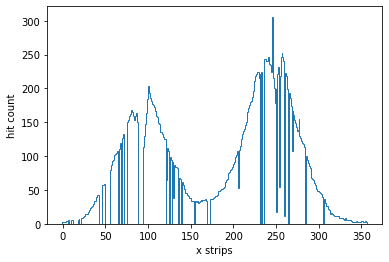

----- Hits on y strips -----


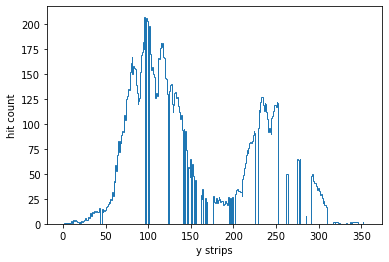

----- Event Time Range-----


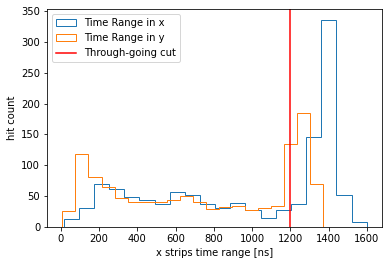

----- ADC distribution-----


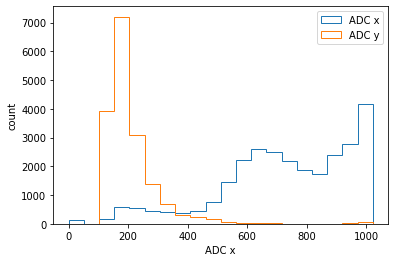

In [6]:

# Create pandas data frame of the cluster info
df_cluster = stripROtools.read_root(file_loc, clusters=True, hits=False)

# Define additional columns

# number of hits
df_cluster["nhits"]=df_cluster.apply(lambda row: len(row.strips0)+len(row.strips1) ,axis=1)
df_cluster["electrons_x"] = df_cluster.adc0.apply(lambda x: 6240 * ( x / (1.0*Mult_factor) ) ) # 1 mV/fC is VMM gain setting for x channels, 170mV is the pedestal, 1200mV is th operating voltage 1024 is the number of possible ADC values
df_cluster["electrons_y"] = df_cluster.adc1.apply(lambda x: 6240 * ( x / (1.0*Mult_factor) ) ) # 1 mV/fC is VMM gain setting for y channels, 170mV is the pedestal, 1200mV is th operating voltage 1024 is the number of possible ADC values
df_cluster["electrons"] = df_cluster.electrons_x + df_cluster.electrons_y


# length on x/y plane in units of strip lengths
df_cluster["L"]=np.sqrt((df_cluster.strips0.apply(np.max) - df_cluster.strips0.apply(np.min))**2 + (df_cluster.strips1.apply(np.max) - df_cluster.strips1.apply(np.min))**2)

# time range on x strips
df_cluster["TR0"] = df_cluster.times0.apply(np.max)-df_cluster.times0.apply(np.min)

# time range on y strips
df_cluster["TR1"] = df_cluster.times1.apply(np.max)-df_cluster.times1.apply(np.min)


print("----- Hits on x strips -----")
plt.figure()
n,bins,patches = plt.hist(np.concatenate(df_cluster.strips0),bins=strip_edges,histtype='step')
bin_centers = (bins+(bins+1))/2
#plt.axvline(bin_centers[np.argmax(n)],color='k',label=str(int(bin_centers[np.argmax(n)])) )
plt.xlabel("x strips")
plt.ylabel("hit count")
plt.show()
# plot the y hits

print("----- Hits on y strips -----")
plt.figure()
n,bins,patches = plt.hist(np.concatenate(df_cluster.strips1),bins=strip_edges,histtype='step')
bin_centers = (bins+(bins+1))/2
#plt.axvline(bin_centers[np.argmax(n)],color='k',label=str(int(bin_centers[np.argmax(n)])) )
plt.xlabel("y strips")
plt.ylabel("hit count")
plt.show()

# Plot the time range in x, throughgoing alphas take up the largets time range
print("----- Event Time Range-----")

plt.figure()
plt.hist(df_cluster["TR0"],bins=20,histtype='step', label="Time Range in x")
plt.hist(df_cluster["TR1"],bins=20,histtype='step', label="Time Range in y")
plt.axvline(1200, color='r',label="Through-going cut")
plt.xlabel("x strips time range [ns]")
plt.ylabel("hit count")
plt.legend()
plt.show()


#Plot ADC x distribution
print("----- ADC distribution-----")

plt.figure()
plt.hist(np.concatenate(df_cluster.adcs0), bins=20, histtype="step", label="ADC x")
plt.hist(np.concatenate(df_cluster.adcs1), bins=20, histtype="step", label="ADC y")
plt.xlabel("ADC x")
plt.ylabel("count")
plt.legend()
plt.show()

selecting through-going tracks within 25 degrees of vertical...
Number of remaining events:  259
----- hits in x and y  -----


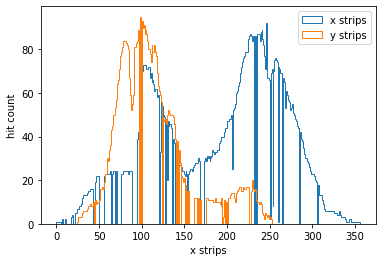

In [7]:
    print("selecting through-going tracks within 25 degrees of vertical...")

    # Cut for throughgoing events  with over 8 hits 
    df_cut = df_cluster.loc[ (df_cluster.TR0 > 1200) & (df_cluster.TR1 > 1200) & (df_cluster.nhits > 8) ]
    df_cut=df_cut.reset_index(drop=True)

    print("Number of remaining events: ", len(df_cut) )

    print("----- hits in x and y  -----")

    # Plot x hits

    plt.figure()
    n,bins,patches = plt.hist(np.concatenate(df_cut.strips0),bins=strip_edges,histtype='step',label= "x strips")
    n,bins,patches = plt.hist(np.concatenate(df_cut.strips1),bins=strip_edges,histtype='step',label= "y strips")
    plt.legend()
    plt.xlabel("x strips")
    plt.ylabel("hit count")
    plt.show()

# Examples of 3D reconstructions

In [8]:
T_off = pd.read_pickle("./data/time_offset.pk")

# 3D clustering parameters
mu = T_off.iloc[8]["Mu"]
sigma = T_off.iloc[8]["Sigma"]
n_sigma = 3

T_off

,Name,Mu,Mu_err,Sigma,Sigma_err
0,UH DLC a,-6.684141,0.031719,16.382493,0.024764
1,UH DLC b,-5.208232,0.034228,16.305925,0.026783
2,UH DLC c,6.752723,0.038583,14.113659,0.031446
3,UH DLC d,6.852294,0.058807,14.800689,0.048234
4,UH NoDLC a,5.703480,0.075588,19.574833,0.061573
5,UH NoDLC b,5.473110,0.114114,19.799337,0.092169
6,UH NoDLC c,25.241775,0.189180,18.082547,0.159142
7,UH NoDLC d,20.674842,0.698955,17.886667,0.626167
8,UoS,-11.400385,0.026963,15.290716,0.021079


[ 102.84350586   13.14221191    0.           32.42449951   56.60101318
   79.41467285  100.09405518  119.75408936  136.48852539  157.71008301
  188.14953613  210.02288818  217.11981201  242.86529541  260.09246826
  273.41003418  303.92449951  323.83331299  359.34814453  375.58660889
  391.9052124   411.20318604  427.47576904  459.49493408  478.14916992
  491.66778564  520.0401001   534.68579102  565.04534912  591.89398193
  608.44909668  642.19665527  667.17669678  692.99121094  714.89416504
  732.77111816  740.53167725  771.51776123  791.06140137  804.63372803
  837.64221191  849.63470459  860.99151611  892.44287109  916.34436035
  942.8147583   959.76635742  975.52386475  994.34326172 1015.49731445
 1041.0057373  1055.21179199 1089.58898926 1108.81982422 1114.7175293
 1139.15527344 1183.6751709  1247.16711426 1272.16711426 1297.16711426
 1322.16711426 1322.16711426 1347.16711426 1347.16711426 1397.16711426]


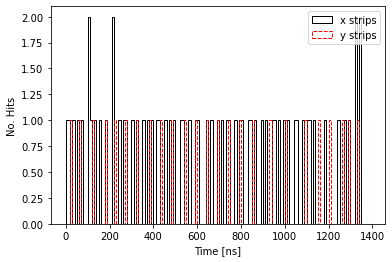

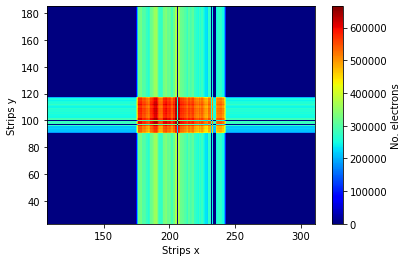

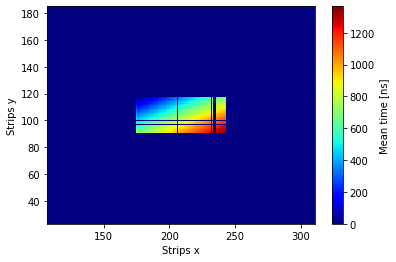

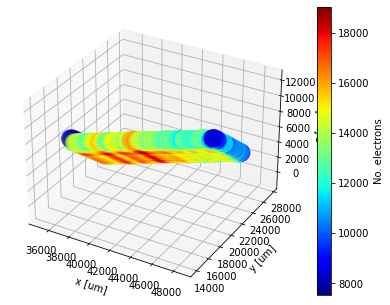

/Users/majdghrear/Lab/2DstripRO/stripROtools.py:663: RuntimeWarning: invalid value encountered in reciprocal
  abs_t_off = np.reciprocal(abs_t_off,where= abs_t_off!=0)


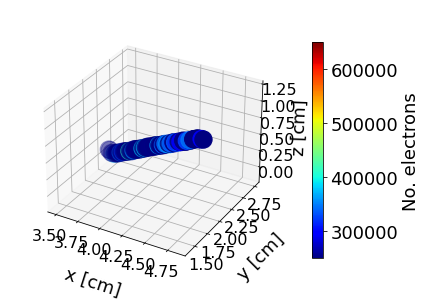

In [13]:
# Look at a single event after the cut
test_event = df_cut.iloc[5]
# Make a TrackTools object for the event
dsp = stripROtools.TrackTools(event = test_event, Mult_factor = Mult_factor, gain_x=9, gain_y=4.5, v_drift=8.0)

# Plot 1D time display
dsp.TimeHistView( t_bin =10)

# Plot 2D displays of charge and time
dsp.Strip2DView(fullview = False)
dsp.Strip2DView_times(fullview = False)

# Plot 3D displays
dsp.Reconst3D_v0()
x,y,z,c = dsp.Reconst3D_v1( mu = mu, sigma = sigma , n_sigma = n_sigma,save_name = "real_alpha")

In [10]:
dsp

There are 3 known issues: 

1. Too few hits on the lower strips to reconstruct

2. Seemingly unrelated hits being included in cluster 

3. Hits that appear to be delayed, often seen on strip

We identify and solve these issues using 3 methods.


# Method 1: Only consider tracks with >5 points

As counted after methods 2 and 3 have been applied

# Method 2: Using the min time / strips quantitiy

Delayed hits are clear outliers, the quantity [time difference to neighbors / distance to neighor] is above 250 for UoS and UH detectors. See distribution below.

We remove hits where min[time difference to neighbors / distance to neighor] over RHS and LHS neighbors is greater than 250 


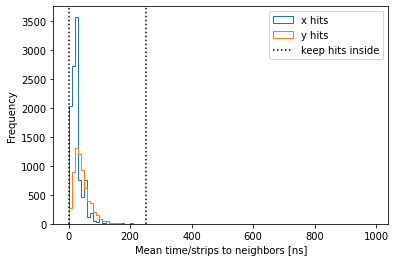

In [9]:
# Make the track pruning plot


xdiffs = np.array([])
xstrips = np.array([])
ydiffs = np.array([])
ystrips = np.array([])


for i in range(len(df_cut)):
    test_event = df_cut.iloc[i]

    dsp = stripROtools.TrackTools(event = test_event, gain_x=9, gain_y=4.5, v_drift=8.0)

    # For each x hit, compute the time difference to its neighboring strip on the left and right hand side
    Txdiff = np.absolute(np.diff(dsp.times_x))
    Txdiff_L = np.append(Txdiff[0],Txdiff)
    Txdiff_R = np.append(Txdiff,Txdiff[-1])
    # For each x hit, compute the distance (in strips) to the neighboring strip on the left and right hand side
    Sxdiff = np.absolute(np.diff(dsp.strips_x))
    Sxdiff_L = np.append(Sxdiff[0],Sxdiff)
    Sxdiff_R = np.append(Sxdiff,Sxdiff[-1])

    # Now find the mean of time/strips on the left vs right hand side
    xdiff = np.min([Txdiff_L/Sxdiff_L,Txdiff_R/Sxdiff_R],axis=0)

    # Append to array of xdiffs
    xdiffs = np.append(xdiffs,xdiff)
    # Also append strip numbers
    xstrips = np.append(xstrips,dsp.strips_x)

    # For each y hit, compute the time difference to its neighboring strip on the left and right hand side
    Tydiff = np.absolute(np.diff(dsp.times_y))
    Tydiff_L = np.append(Tydiff[0],Tydiff)
    Tydiff_R = np.append(Tydiff,Tydiff[-1])
    # For each x hit, compute the distance (in strips) to the neighboring strip on the left and right hand side
    Sydiff = np.absolute(np.diff(dsp.strips_y))
    Sydiff_L = np.append(Sydiff[0],Sydiff)
    Sydiff_R = np.append(Sydiff,Sydiff[-1])

    # Now find the mean of time/strips on the left vs right hand side
    ydiff = np.min( [Tydiff_L/Sydiff_L,Tydiff_R/Sydiff_R], axis = 0)

    # Append to array of xdiffs
    ydiffs = np.append(ydiffs,ydiff)
    ystrips = np.append(ystrips,dsp.strips_y)

plt.hist(xdiffs, bins = np.arange(0,1000,10), histtype="step",label="x hits")
plt.hist(ydiffs, bins = np.arange(0,1000,10), histtype="step",label="y hits")
plt.axvline(250, linestyle=":",color="k",label="keep hits inside")
plt.axvline(0, linestyle=":",color="k")
plt.xlabel("Mean time/strips to neighbors [ns]")
plt.ylabel("Frequency")
plt.legend()



Because alpha tracks are straight, the time / strips to nearest neighbor is set by the angle of the track with respect to vertical and the drift speed. The fact the we select tracks that are within 25 degrees allows us to prune hits where this quantity is too small. There are also outliers where this quantity is too large - delayed or unrelated hits.

# Method 3: Use the gap to nearest neighbor quantity

In [66]:
# Make max diffs plot

all_diffs = []
xstrips = np.array([])




for i in range(len(df_cut)):

    try:
        test_event = df_cut.iloc[i]

        dsp = stripROtools.TrackTools(event = test_event, gain_x=9, gain_y=4.5, v_drift=8.0)
        dsp.prune_track(T_L = 41.1, T_H=250)

        

        diffs = np.diff(dsp.strips_x)
        diffs_L = np.append(diffs[0],diffs)
        diffs_R = np.append(diffs,diffs[0])

        min_diffs = np.minimum(diffs_L,diffs_R)

        all_diffs = np.append(all_diffs,min_diffs)
        xstrips = np.append(xstrips,dsp.strips_x)
        

    except:
        pass


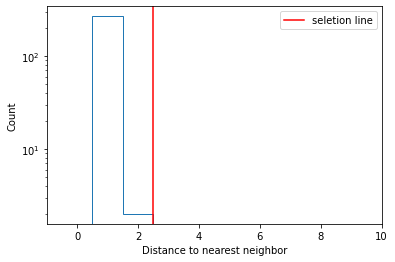

In [67]:
plt.hist(all_diffs,bins=np.arange(-0.5,10.5,1.0),histtype="step")
plt.yscale("log")
plt.xlabel("Distance to nearest neighbor")
plt.axvline(2.5,color="red",label="seletion line")
plt.ylabel("Count")
plt.legend()

In [68]:
xstrips[all_diffs>2]

array([], dtype=float64)

In [69]:
2/len(all_diffs)*100

0.7434944237918215

We remove hits with a gap of greater than 2 strips to the nearest neighbor

# Results after appliying these methods

[1337.06811523 1287.06811523 1212.06811523 1137.06811523 1062.06811523
  987.06811523  912.06811523  837.06811523  762.06811523  687.06811523
  612.06811523  537.06811523  387.06811523  312.06811523  212.06811523
  137.06811523   62.06811523]


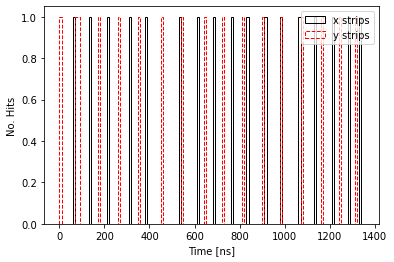

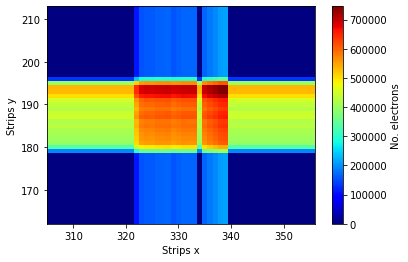

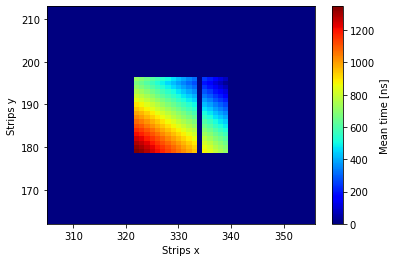

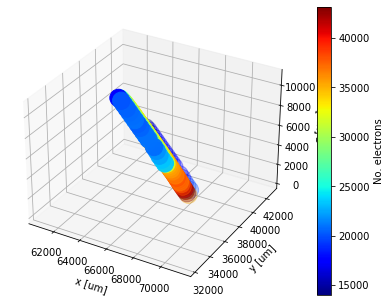

/Users/majdghrear/Lab/2DstripRO/stripROtools.py:663: RuntimeWarning: invalid value encountered in reciprocal
  abs_t_off = np.reciprocal(abs_t_off,where= abs_t_off!=0)


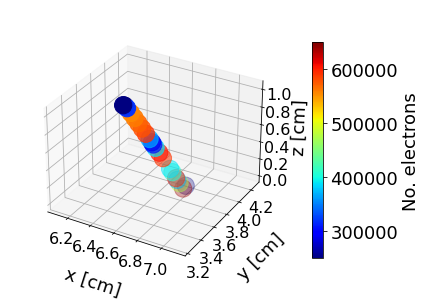

In [37]:
# Look at a single event after the cut
test_event = df_cut.iloc[2]
# Make a TrackTools object for the event
dsp = stripROtools.TrackTools(event = test_event, Mult_factor = Mult_factor, gain_x=9, gain_y=4.5, v_drift=8.0)

# Remove delayed hits (as discussed in the slides)
dsp.prune_track(T_L = 0, T_H=250)
dsp.prune_track2(gap=2)


# Plot 1D time display
dsp.TimeHistView( t_bin =10)

# Plot 2D displays of charge and time
dsp.Strip2DView(fullview = False)
dsp.Strip2DView_times(fullview = False)

# Plot 3D displays
dsp.Reconst3D_v0()
x,y,z,c = dsp.Reconst3D_v1( mu = mu, sigma = sigma , n_sigma = n_sigma,save_name = "real_alpha")